# Implementando la técnica del codo y el coeficiente de la silueta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1),2)

In [6]:
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

Text(0,0.5,'y')

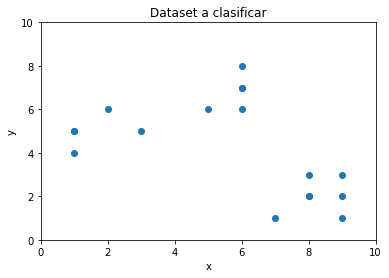

In [9]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.scatter(x1, x2)
plt.xlabel("x")
plt.ylabel("y")

* Para k = 2  el promedio de la silueta es de:  0.6113424368705715
   - para i =  1  la silueta del cluster vale:  0.7746251901389686
   - para i =  2  la silueta del cluster vale:  0.49704450958269375
* Para k = 3  el promedio de la silueta es de:  0.7122079383287169
   - para i =  1  la silueta del cluster vale:  0.7345257364682265
   - para i =  2  la silueta del cluster vale:  0.6609508863896014
   - para i =  3  la silueta del cluster vale:  0.7322200728725188
* Para k = 4  el promedio de la silueta es de:  0.6389948643127632
   - para i =  1  la silueta del cluster vale:  0.654458796162702
   - para i =  2  la silueta del cluster vale:  0.7345257364682265
   - para i =  3  la silueta del cluster vale:  0.655666655624379
   - para i =  4  la silueta del cluster vale:  0.24096929517637128
* Para k = 5  el promedio de la silueta es de:  0.46983374375750137
   - para i =  1  la silueta del cluster vale:  0.655666655624379
   - para i =  2  la silueta del cluster vale:  0.377656850973

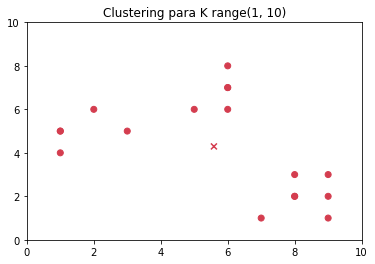

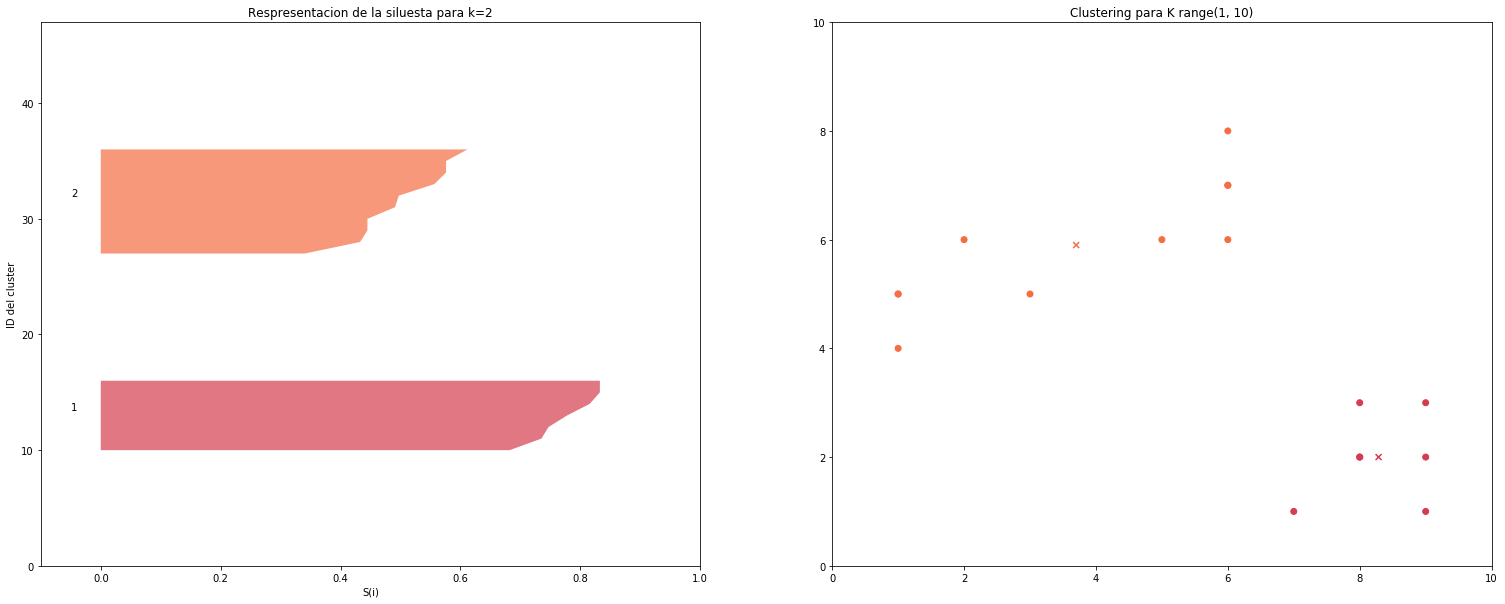

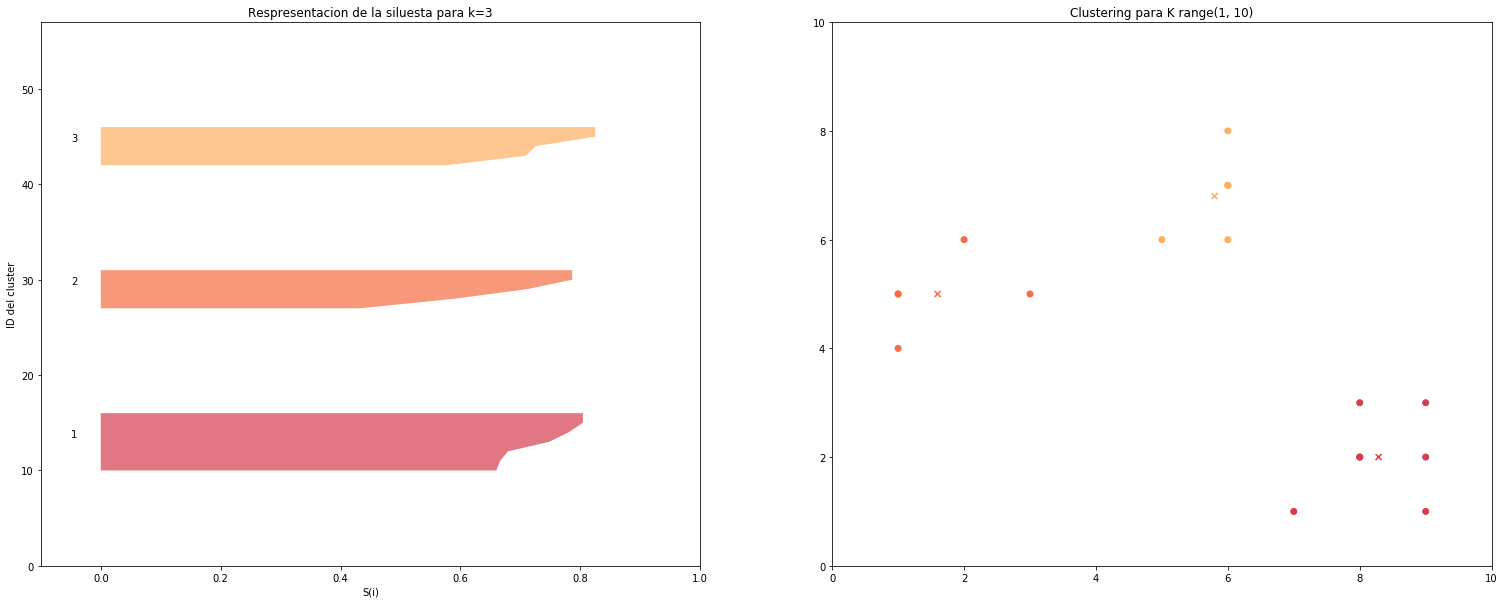

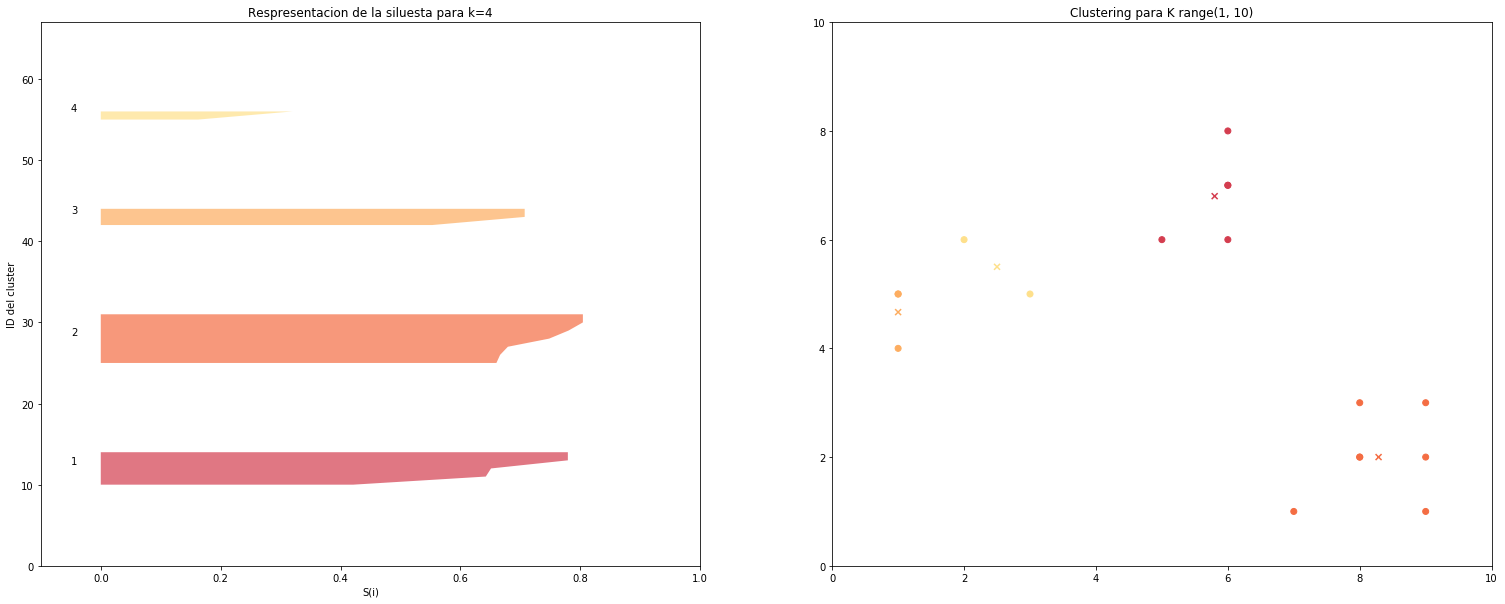

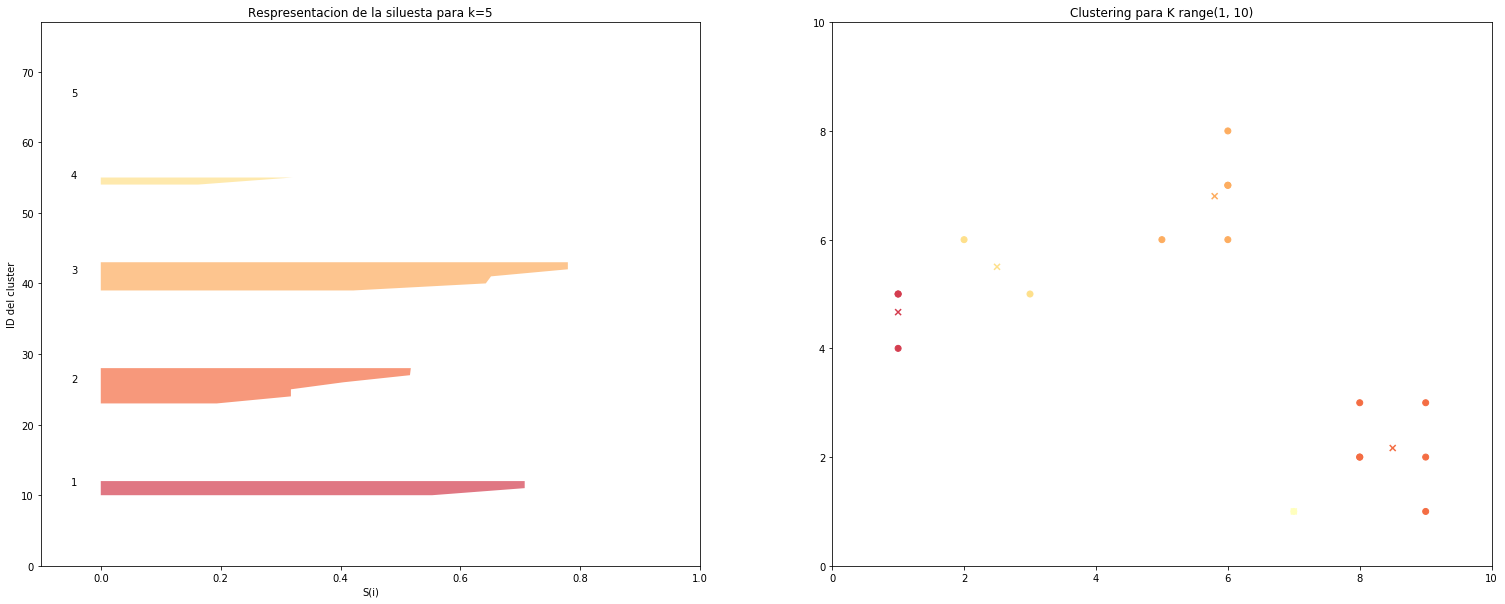

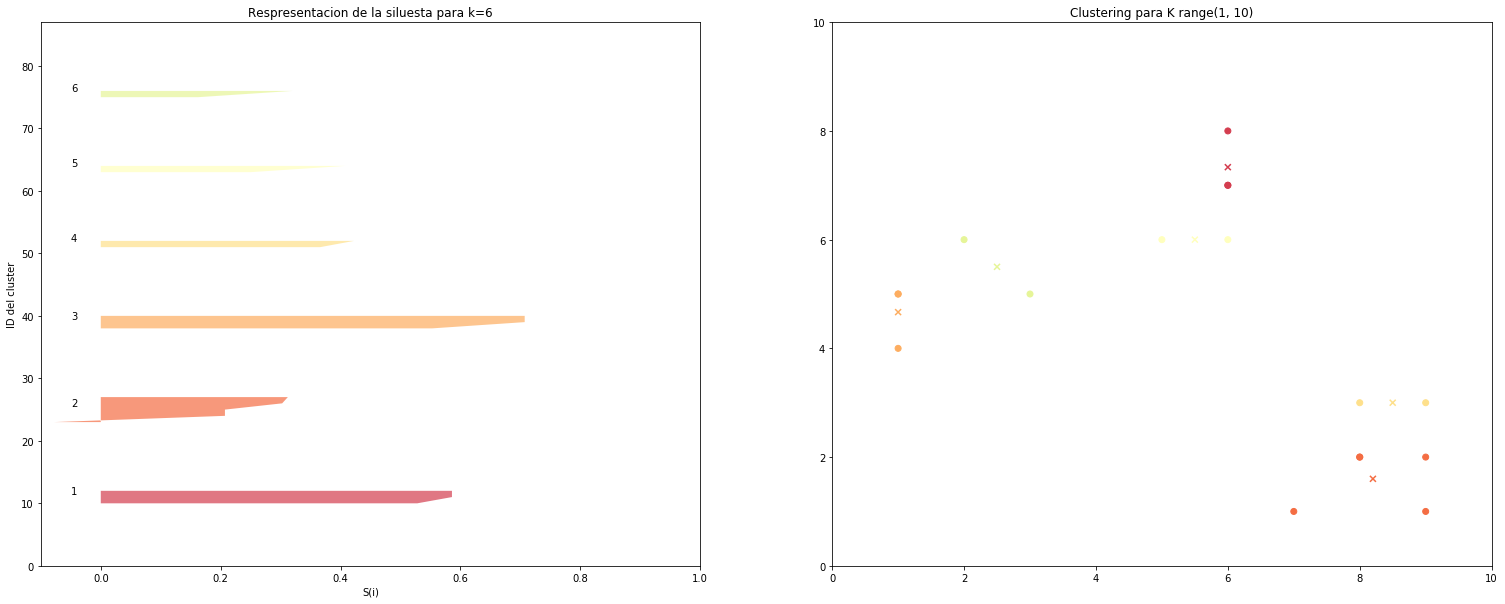

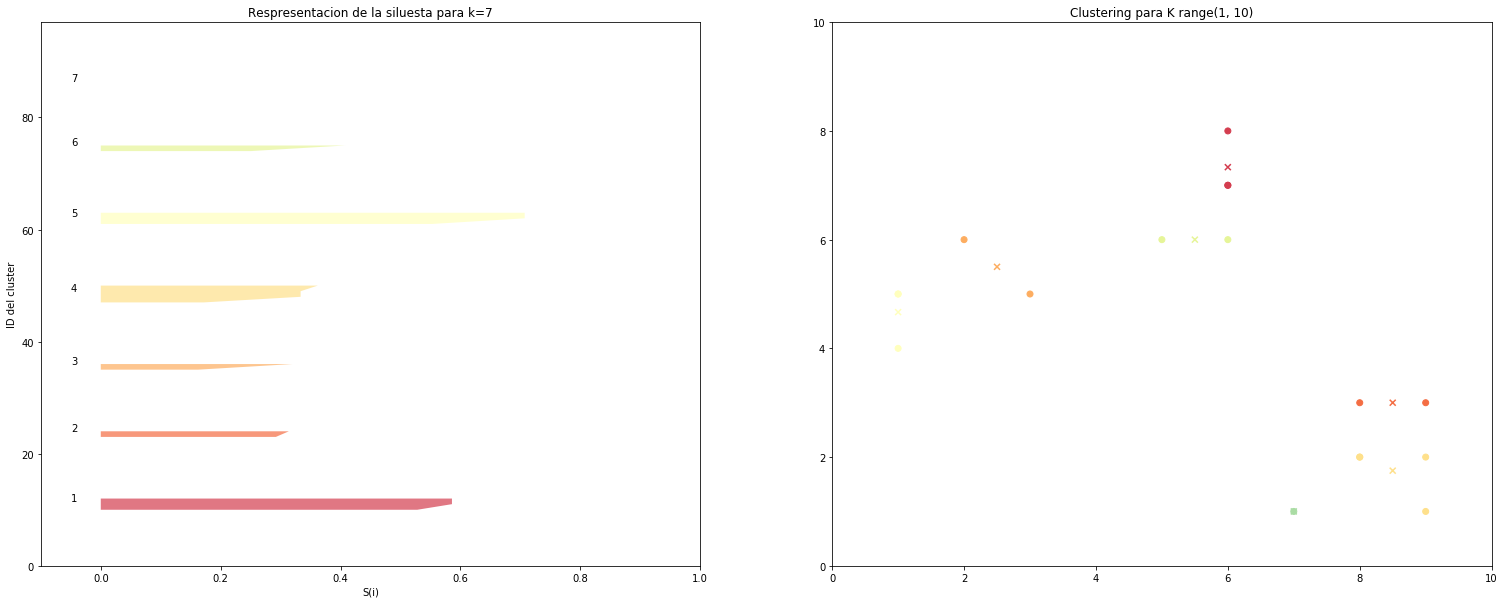

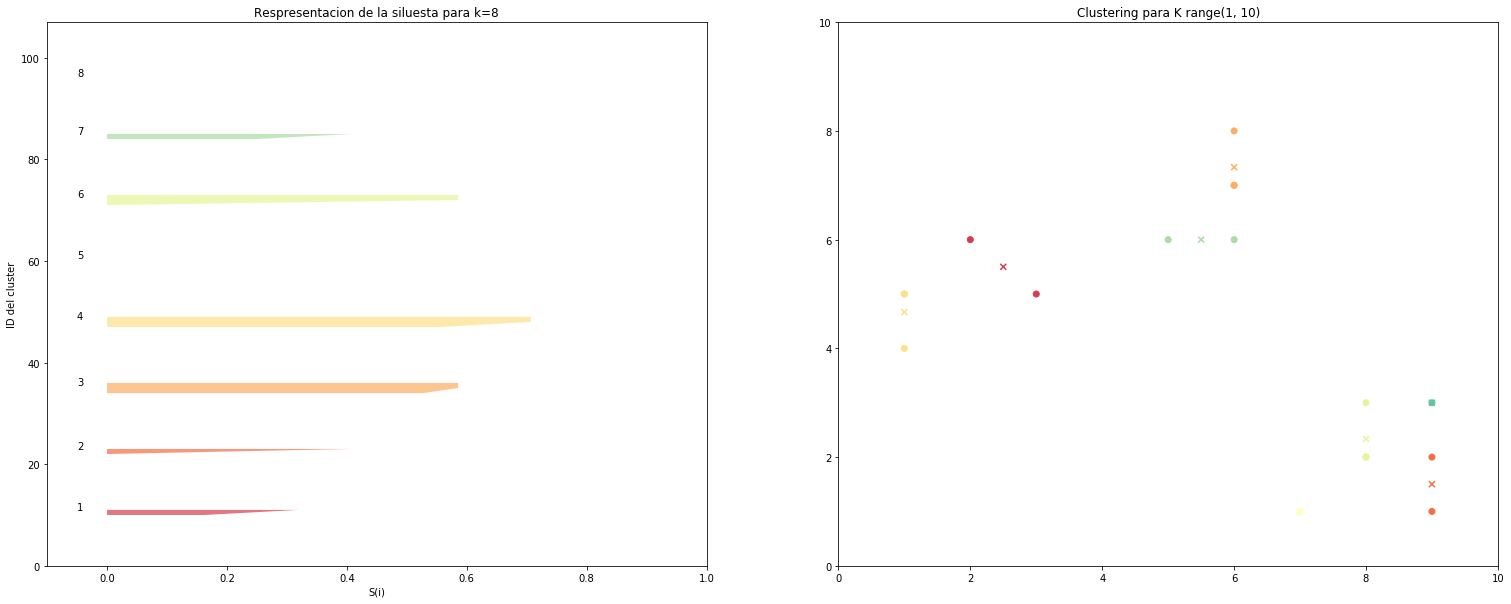

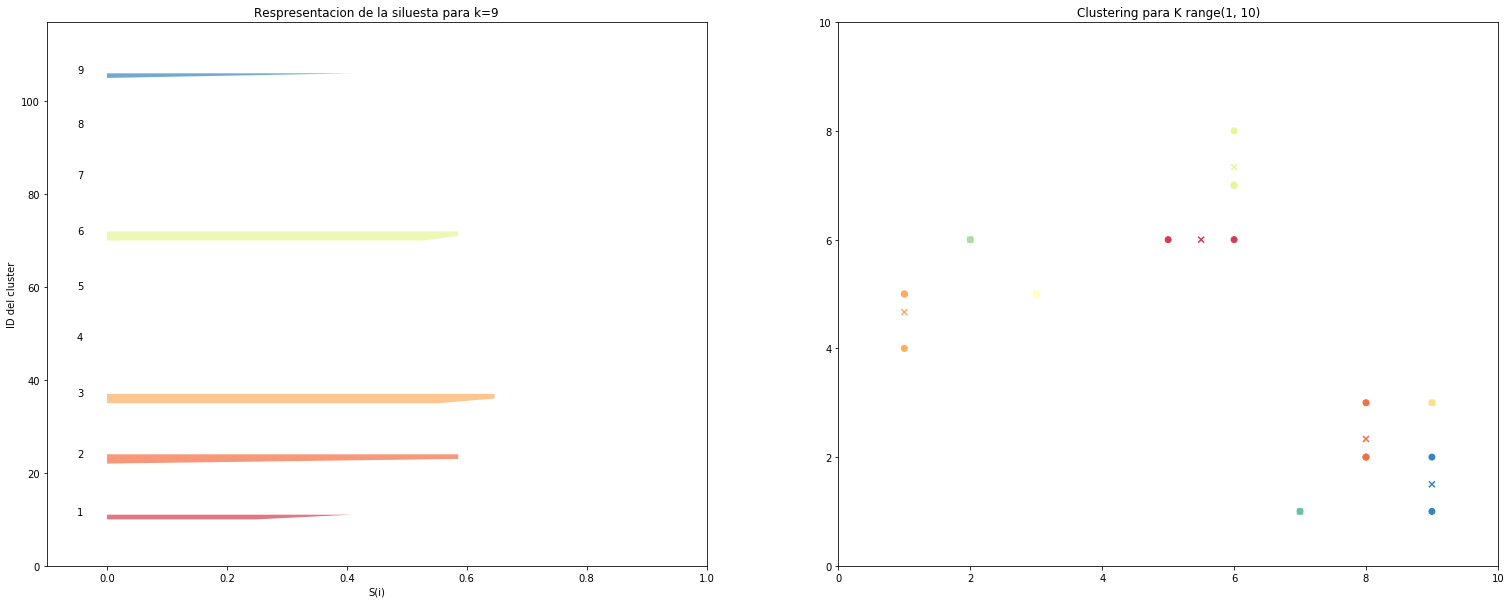

In [20]:
max_k = 10 ## Maximo numero de cluster a crear
K = range(1,max_k)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X) / len(X) for i in K]
sst = sum(np.min(cdist(X,centroid,"euclidean"), axis=1))

for k in K:
    kmeansmodel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeansmodel.cluster_centers_)
    labels = kmeansmodel.labels_
    
    ssw_k = sum(np.min(cdist(X,kmeansmodel.cluster_centers_,"euclidean"),axis=1))
    ssw.append(ssw_k)
    labels_colors = [color_palette[i] for i in labels]
    
    ## Fabricaremos una silueta para cada cluster
    # Por seguridad no hacemos silueta si k es menor que uno o mayor el tamaño de X
    if 1<k<len(X):
        # Crear un subplot de 1 fila y 1 columna
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(26,10)
        
        # el primer subplot contendra la silueta que puede terner valores de -1 a 1
        # en nuestro caso ya controlamos que esta entre -1 y 1
        axis1.set_xlim([-0.1,1.0])
        # el numero de cluster a insertar determinara el tamaño de cada barra
        # el coeficience (n_clusters+1) * 10 sera el espacio en blanco que dejaremos entre siluetas
        axis1.set_ylim([0,len(X)+(k+1)*10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k =", k, " el promedio de la silueta es de: ",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X,labels)
        
        y_lower = 10
        for i in range(k):
            # agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels==i]
            print("   - para i = ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            # Ordenamos descendientemente
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper), 0, ith_cluster_sv, facecolor=color, alpha=0.7)
            
            #etiquetamos dicho cluster con el nro en centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #calculamos el nuevo y_lower para el siguiente cluster
            y_lower = y_upper + 10 # dejamos vacias 10 posiciones sin muestra
        axis1.set_title("Respresentacion de la siluesta para k=%s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del cluster")
        #Fin de la representacion de la silueta
        
    #plot de los kmean
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title("Clustering para K %s"%str(K))
    plt.scatter(x1,x2,c=labels_colors)
    plt.scatter(centers[0],centers[1],c=color_palette,marker="x")

# Representacion del codo

Text(0.5,1,'La técnica del codo para encontrar el k optimo')

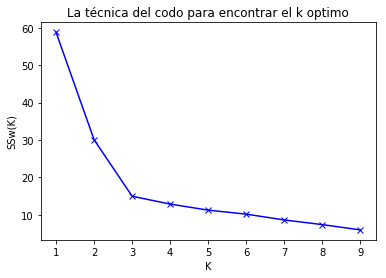

In [27]:
plt.plot(K, ssw, "bx-")
plt.xlabel("K")
plt.ylabel("SSw(K)")
plt.title("La técnica del codo para encontrar el k optimo")

# Representacion del codo normalizado

Text(0.5,1,'La técnica del codo para encontrar el k optimo')

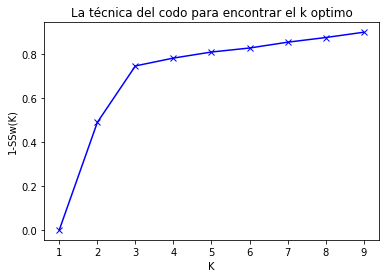

In [30]:
plt.plot(K, 1-ssw/sst, "bx-")
plt.xlabel("K")
plt.ylabel("1-SSw(K)")
plt.title("La técnica del codo para encontrar el k optimo")